In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch.utils.data import Dataset,DataLoader, TensorDataset 
from sklearn.utils import shuffle 
import matplotlib. pyplot as plt

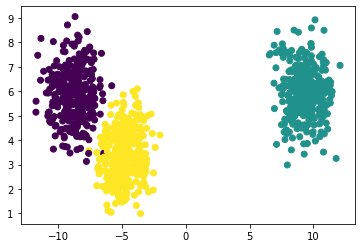

In [13]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot

data,target=make_blobs(n_samples=1000,n_features=4,centers=3)
# print(data)
# print(target)

# 在2D图中绘制样本，每个样本颜色不同
pyplot.scatter(data[:,0],data[:,1],c=target);
pyplot.show()


In [14]:
print(len(data))
train_x=data[:-100]
test_x =data[-100:]
train_y = target[:-100]
test_y = target[-100:]
train_x=torch.from_numpy(train_x).type(torch.FloatTensor)
train_y=torch.from_numpy(train_y).type(torch.LongTensor)
test_x=torch. from_numpy(test_x).type(torch. FloatTensor)
test_y=torch. from_numpy(test_y).type(torch. LongTensor)
train_dataset=TensorDataset(train_x,train_y)
test_dataset=TensorDataset(test_x,test_y)
train_loader=DataLoader(dataset=train_dataset, batch_size=16, shuffle=True) #训练数据加载器
test_loader=DataLoader(dataset=test_dataset, batch_size=8, shuffle=True)#测试数据加载器


1000


In [11]:
#==========构建网络========== 
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1=nn.Linear(4, 8)
        self.out=nn.Linear(8, 3)
    def forward(self,x): 
        x=x.view(x.size(0), -1)
        x=self.hidden1(x) 
        x=F.relu(x) 
        x=self.out(x) 
        return x
    
net=model ()
loss_fn=nn.CrossEntropyLoss()   #交叉燧损失函数
opt=torch.optim.SGD(net.parameters(),lr=0.01) #优化器,学习率设置为0. 01
#========训练============ 
for epoch in range(100):
    for i, data in enumerate(train_loader):
        x, y=data
        pred=net(x)
        loss=loss_fn(pred, y)
        
        opt.zero_grad() 
        loss.backward()
        opt.step ()
    if (epoch%10==0): 
        print(loss)
def rightness(pred, labels):
    pred=torch.max(pred.data,1)[1]
    rights=pred.eq(labels.data.view_as (pred)).sum() 
    return rights, len(labels)
#=========测试(验证)=========
rights=0
length=0
for i, data in enumerate(test_loader):
    x, y=data
    pred=net(x)
    rights=rights+rightness(pred, y)[0] 
    length=length+rightness(pred, y)[1] 
    print(y)
    print(torch.max(pred.data, 1)[1],'\n')
print(rights, length, rights/length)

# ======计算正确率========== 

tensor(0.0917, grad_fn=<NllLossBackward0>)
tensor(0.0049, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor([1, 2, 1, 1, 0, 2, 1, 2])
tensor([1, 2, 1, 1, 0, 2, 1, 2]) 

tensor([1, 2, 0, 2, 0, 0, 0, 1])
tensor([1, 2, 0, 2, 0, 0, 0, 1]) 

tensor([2, 1, 0, 1, 0, 2, 2, 0])
tensor([2, 1, 0, 1, 0, 2, 2, 0]) 

tensor([0, 1, 0, 1, 0, 1, 0, 2])
tensor([0, 1, 0, 1, 0, 1, 0, 2]) 

tensor([1, 0, 2, 1, 0, 2, 1, 2])
tensor([1, 0, 2, 1, 0, 2, 1, 2]) 

tensor([1, 0, 1, 1, 2, 2, 0, 1])
tensor([1, 0, 1, 1, 2, 2, 0, 1]) 

tensor([2, 1, 1, 2, 2, 2, 2, 0])
tensor([2, 1, 1, 2, 2, 2, 2, 0]) 

tensor([2, 2, 1, 2, 1, 0, 0, 1])
tensor([2, 2, 1, 2, 1, 0, 0, 1]) 

tensor([1, 2, 0, 0, 0, 1, 